<a href="https://colab.research.google.com/github/yunyoung207/DNN/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 0. 사용할 패키지 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터셋 생성하기

# 훈련셋과 테스트셋 불러오기
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

# 데이터셋 전처리(0~1사이의 숫자로 변환)
train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))

# 2. 모델 구성하기
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# 4. 모델 학습시키기
history=model.fit(train_x, train_y, epochs=20, verbose=1, batch_size=128, validation_data=(test_x,test_y))

# 5. 모델 평가하기
loss, acc = model.evaluate(test_x, test_y)

print("Test loss : ",loss)
print("Test accuracy : ",acc)

# 6. 모델 저장하기
#model.save("MNIST_DNN_model.h5")

# 학습과정 살펴보기
# 훈련과 검증 오차 그리기
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
             
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련과 검증 정확도 그리기
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
             
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.9358 - acc: 0.7190 - val_loss: 0.4812 - val_acc: 0.8641
Epoch 2/20
60000/60000 [=========================

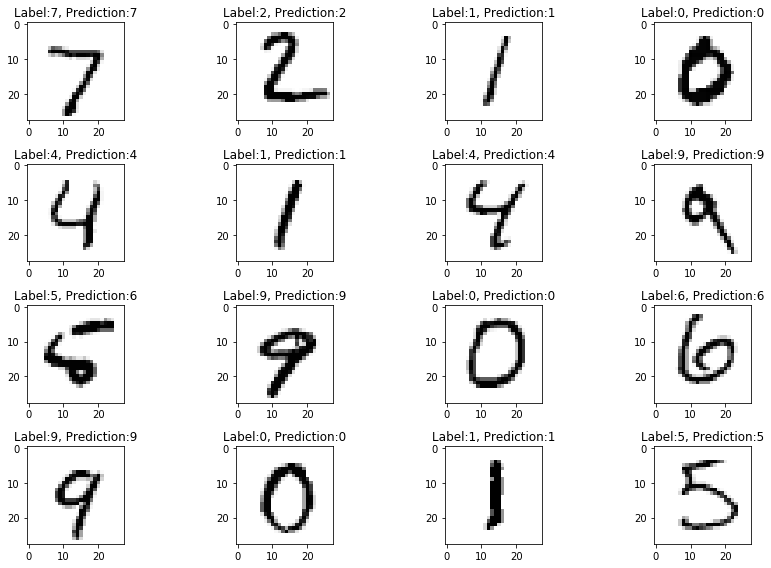

In [0]:
# 8. 모델 사용하기
# 예측 결과를 확인하기 위해 테스트 데이터 16개 출력해보기
predicted_result = model.predict(test_x)
predicted_lablels = np.argmax(predicted_result, axis=1)

plt.figure(figsize=(12,8))
count = 0

for i in range(16):
  count +=1
  plt.subplot(4,4,count)
  plt.imshow(test_x[i].reshape(28,28), cmap="Greys", interpolation="nearest")
  tmp = "Label:"+str(test_y[i])+", Prediction:"+str(predicted_lablels[i])
  plt.title(tmp)

plt.tight_layout()
plt.show()  

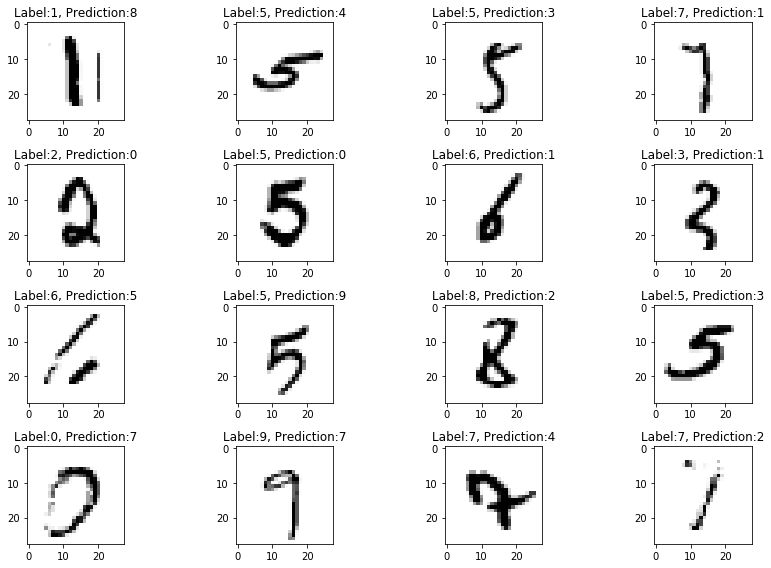

In [0]:
#예측이 틀린 데이터중에서 16개만 뽑아서 출력해보기
import random

predicted_result = model.predict(test_x)
predicted_lablels = np.argmax(predicted_result, axis=1)

wrong_result = []

for i in range(0, len(test_y)):
  if predicted_lablels[i] != test_y[i]:
    wrong_result.append(i)

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(12,8))
count = 0

for i in samples:
  count +=1
  plt.subplot(4,4,count)
  plt.imshow(test_x[i].reshape(28,28), cmap="Greys", interpolation="nearest")
  tmp = "Label:"+str(test_y[i])+", Prediction:"+str(predicted_lablels[i])
  plt.title(tmp)

plt.tight_layout()
plt.show()  

